### Project: Customer Segmentation
#### This is an Unsupervised Learning problem statement
Dataset used is available along with its details at https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('Mall_Customers.csv')
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform basic EDA

In [3]:
df_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Observation:
No null values

In [6]:
df_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Observation:
CustomerID is similar to index and not giving any extra information, it can be dropped

In [7]:
df_data.drop('CustomerID', axis=1, inplace=True)
df_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
# Renaming the columns to make it easy to use
df_data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'}, inplace=True)

#### Plot all features

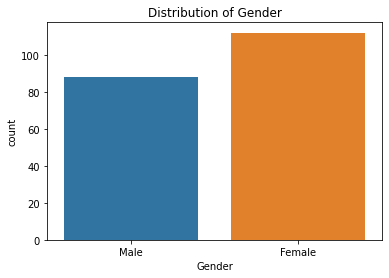

In [9]:
sns.countplot(x='Gender', data=df_data)
plt.title('Distribution of Gender')
plt.show()

#### Observation:
More Female customers than Male Customers, but it is not imbalanced.

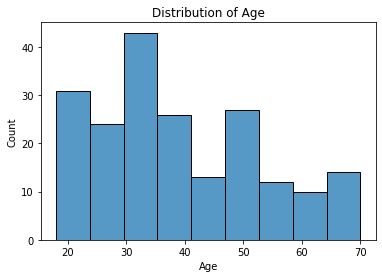

In [10]:
sns.histplot(x='Age', data=df_data)
plt.title('Distribution of Age')
plt.show()

#### Observation:
Maximum Customers belong to the Age Group 30-35

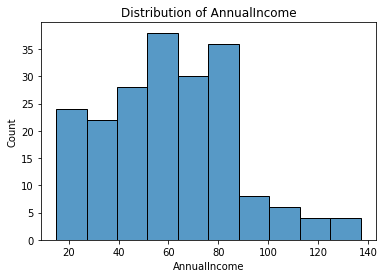

In [11]:
sns.histplot(x='AnnualIncome', data=df_data)
plt.title('Distribution of AnnualIncome')
plt.show()

#### Observation:
Maximum Customers have annual income between 50k to 90k$

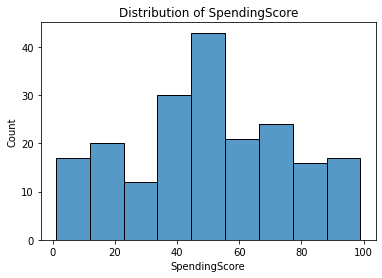

In [12]:
sns.histplot(x='SpendingScore', data=df_data)
plt.title('Distribution of SpendingScore')
plt.show()

#### Observation:
Maximum Customers have a spending score around 50